In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
from astropy.table import Table
t = Table.read('../ophiuchus.vot', format='votable')

print("Finished reading Table. Read ",len(t['__Gmag_'])," sources")

Finished reading Table. Read  503325  sources


In [4]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']


In [138]:
RA = t['RA_ICRS']
DE = t['DE_ICRS']
plx = t['Plx']
Gmag = t['__Gmag_']
num = len(RA)


(array([  2.00000000e+00,   1.50000000e+01,   6.80000000e+01,
          4.18000000e+02,   2.46800000e+03,   1.06520000e+04,
          4.13680000e+04,   1.51763000e+05,   2.95928000e+05,
          6.43000000e+02]),
 array([  4.28800011,   6.13630009,   7.98460007,   9.83290005,
         11.68120003,  13.52950001,  15.37779999,  17.22609997,
         19.07439995,  20.92269993,  22.77099991]),
 <a list of 10 Patch objects>)

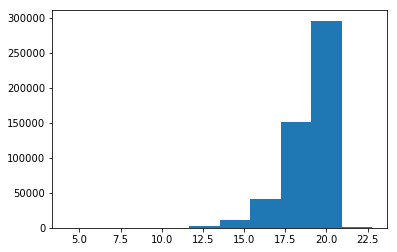

In [139]:
plt.hist(Gmag)

In [6]:
X1 = np.zeros(num)
Y1 = np.zeros(num)
for i in range(0,num):
    X1[i] = RA[i]
    Y1[i] = DE[i]
X = np.column_stack((X1,Y1))
print(len(X))

503325


In [142]:
#create subset of stars with magnitudes < 17
Gstars = np.array([])
Gstars_indices = np.array([])
for i in range(len(Gmag)):
    if (Gmag[i] < 17):
        Gstars = np.append(Gstars, Gmag[i])
        Gstars_indices = np.append(Gstars_indices, i)
print(len(Gstars))

GRA = np.array([])
GDE = np.array([])
for i in Gstars_indices:
    j = int(i)
    GRA = np.append(GRA, RA[j])
    GDE = np.append(GDE, DE[j])
    
#array of coordiantes for the stars
num = len(Gstars)
X2 = np.zeros(num)
Y2 = np.zeros(num)
for i in range(0,num):
    X2[i] = GRA[i]
    Y2[i] = GDE[i]
X2 = np.column_stack((X2,Y2))
print(len(X2))

46716
46716


In [59]:
#compare stelllar densities in different regions
stars1 = 0
stars2 = 0

for i in range(len(RA)):
    if ( RA[i] > 249 and RA[i] < 249.5 and DE[i] > -23 and DE[i] < -22.5):
        stars1 = stars1 + 1
    if (RA[i] > 246.5 and RA[i] < 247 and DE[i] > -24.75 and DE[i] < -24.25):
        stars2 = stars2 + 1
density1 = stars1/(0.5*0.5)
density2 = stars2/(0.5*0.5)

print(density1)
print(density2)        

31000.0
392.0


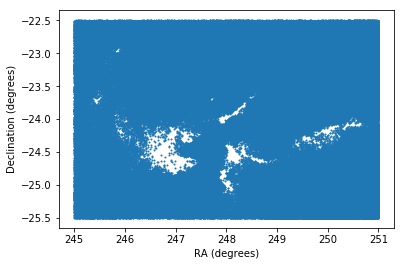

In [7]:
plt.scatter(RA,DE, s = 1)
plt.xlabel('RA (degrees)')
plt.ylabel('Declination (degrees)')
plt.show()

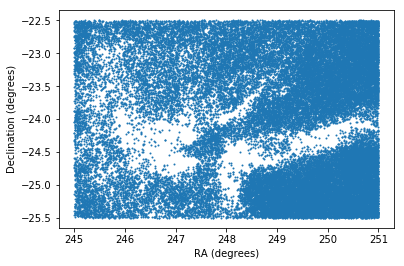

In [143]:
plt.scatter(GRA,GDE, s = 1)
plt.xlabel('RA (degrees)')
plt.ylabel('Declination (degrees)')
plt.show()

In [8]:
#ranges of coordinates and density of stars
RAmin = min(RA)
RAmax = max(RA)
DEmin = min(DE)
DEmax = max(DE)
RA_range = RAmax - RAmin
DE_range = DEmax - DEmin
area = RA_range*DE_range
num = len(RA)
density = num/area
print(RA_range)
print(DE_range)
print(area)
print(num)
print(density)

5.9999703714
2.9999811586
17.9997980664
503325
27962.8137018


In [163]:
#create mapping function
def distance_map(data,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour):
    from scipy.spatial import KDTree

    #use KD tree to find distances to nearest neighbor stars
    tree = KDTree(data)
    
    diffRA = (RAmax - RAmin)
    diffDE = (DEmax - DEmin)
    
    pixel_count2 = pixel_count
    
    if (diffRA < diffDE):
        dDE = diffDE/pixel_count2
        pixel_count = int(diffRA/dDE)
        dRA = diffRA/pixel_count
    if (diffRA > diffDE):
        dRA = diffRA/pixel_count
        pixel_count2 = int(diffDE/dRA)
        dDE = diffDE/pixel_count2
    if (diffRA == diffDE):
        dRA = diffRA/pixel_count
        dDE = diffDE/pixel_count
        
    #create array of coordinates for image background
    for i in range(0,pixel_count):
        for j in range(0,pixel_count2):
            if (i==0 and j == 0):
                array4 = np.array([RAmin,DEmin])
            else:
                array3 = [RAmin+i*dRA,DEmin+j*dDE]
                array4 = np.vstack((array4,array3))

    #find nearest neighbor distances to background points
    image = tree.query(array4,k=neighbor+1)

    #change array of background points so it is pixel_count x pixel_count2
    dist2 = image[0][:,neighbor-1]
    dist2 = np.resize(dist2,(pixel_count,pixel_count2))
    dist2 = np.rot90(dist2, k=1, axes=(1,0))
    dist2 = np.fliplr(dist2)

    #display map   
    plt.imshow(dist2, origin='lower',extent=[RAmin,RAmax,DEmin,DEmax])
    plt.show()
    
    #contours
    if (contour == True):
        ct = plt.contourf(dist2, cmap='tab10',extent=[RAmin,RAmax,DEmin,DEmax])
        plt.colorbar()
        #find stars between contours
        #ct2 = ct.collections[2].get_paths()[0]
        #v = ct2.vertices
        #x = v[:,0]
        #y = v[:,1]
        #plt.scatter(x,y,s=2,c = 'w')
        for i in range(len(X)):
            for i in range(len())
            if (X[0,i] )
    if (scatter == True):
        plt.scatter(data[:,0],data[:,1],s = 1,c = 'k')
        plt.show()
    return

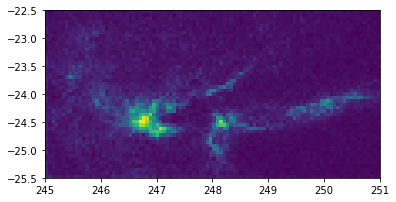

Elapsed time is: 5.3221184108406305


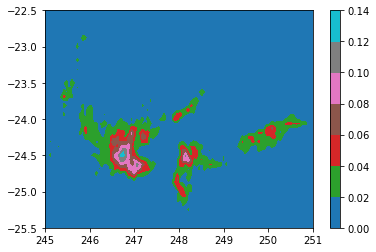

In [164]:
import timeit
start_time = timeit.default_timer()
    
#range of coordinates
pixel_count = 100
image = False
scatter = False
contour = True
neighbor = 5

distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour)
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))

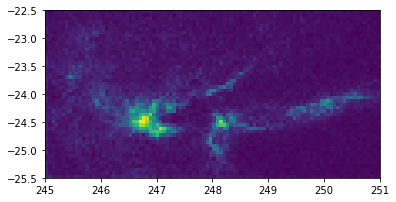

Elapsed time is: 5.486893510445952


In [165]:
import timeit
start_time = timeit.default_timer()
    
#range of coordinates
pixel_count = 100
image = True
scatter = False
contour = False
neighbor = 5

distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour)
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))

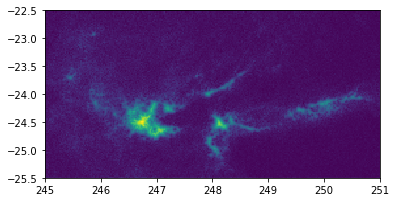

Elapsed time is: 18.622120894491673


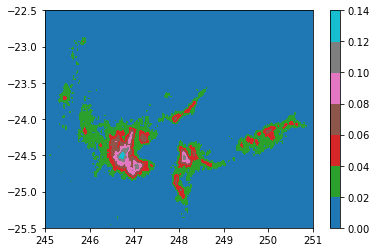

In [166]:
import timeit
start_time = timeit.default_timer()
    
#range of coordinates
pixel_count = 256
image = True
scatter = False
contour = True
neighbor = 5

distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour)
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))

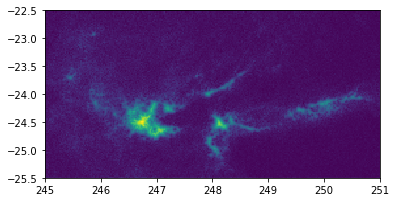

Elapsed time is: 18.627361996099353


In [167]:
import timeit
start_time = timeit.default_timer()
    
#range of coordinates
pixel_count = 256
image = True
scatter = False
contour = False
neighbor = 5

distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour)
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))

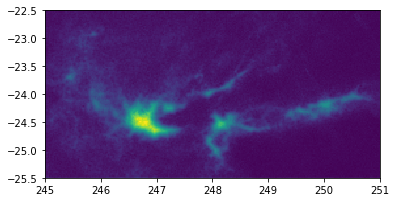

Elapsed time is: 24.97787592932582


In [168]:
import timeit
start_time = timeit.default_timer()
    
#range of coordinates
pixel_count = 256
image = True
scatter = False
contour = False
neighbor = 20

distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour)
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))

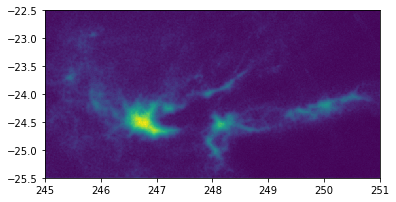

Elapsed time is: 98.98642639629543


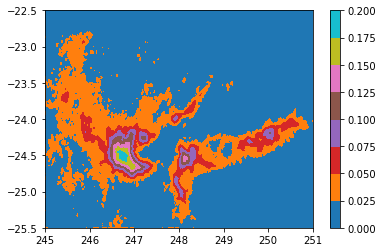

In [169]:
import timeit
start_time = timeit.default_timer()
    
#range of coordinates
pixel_count = 512
image = True
scatter = False
contour = True
neighbor = 20

distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,image, scatter, contour)
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))

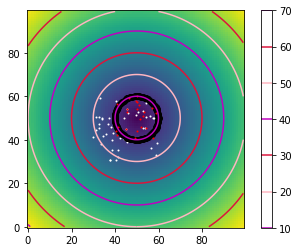

23


In [113]:
#find number of points between contours (test set)

points = np.random.rand(50,2)*30+30
import math
for i in range(0,100):
        for j in range(0,100):
            if (i==0 and j == 0):
                points2 = np.array([0,0])
            else:
                array = [i,j]
                points2 = np.vstack((points2,array))
z= np.zeros((100,100))
for x in range(0,100):
    for y in range(0,100):
        val = math.pow(x-50,2) +math.pow(y-50,2)
        z[x,y] = math.sqrt(val)
plt.imshow(z,origin = 'lower')
plt.scatter(points[:,0],points[:,1],s=1,c='w')
a = plt.contour(z, colors = ['m','lightpink','crimson'])
b = a.collections[0].get_paths()[0]
plt.colorbar()
v = b.vertices
x = v[:,0]
y = v[:,1]
plt.scatter(x,y,c = 'k')

count = 0
for i in range(len(points)):
    if ((points[i,0] < max(x)) and (points[i,0] > min(x)) and (points[i,1] < max(y)) and (points[i,1] > min(y))):
        plt.scatter(points[i,1],points[i,0],s=1,c = 'r')
        count = count+1
plt.show()
print(count)


In [110]:
print(points)
print(points[1,1])
print(points[1,2])

[[ 52.21849091  34.56508561]
 [ 38.09332548  40.65741519]
 [ 52.23461525  33.99361873]
 [ 46.24716458  32.79635276]
 [ 47.36915967  57.01746187]
 [ 54.93220982  37.96094822]
 [ 50.53750688  57.86542642]
 [ 56.73027418  51.21222856]
 [ 58.9732887   46.17742132]
 [ 46.8907052   58.3341892 ]
 [ 39.01812201  30.18072959]
 [ 58.74803253  50.67786032]
 [ 49.90079311  54.92850761]
 [ 55.46644305  49.0751768 ]
 [ 50.72986322  51.78514447]
 [ 56.01628449  41.59597401]
 [ 54.9353994   58.62958171]
 [ 56.77626463  30.776338  ]
 [ 34.58324532  51.77787165]
 [ 57.49319032  38.60218731]
 [ 36.16530844  48.35424018]
 [ 31.34191502  36.13778168]
 [ 43.92973608  42.02010848]
 [ 41.07886093  38.79041975]
 [ 42.76631451  53.89217548]
 [ 54.88892091  35.61164129]
 [ 46.71720023  33.70987005]
 [ 31.28313764  53.72442302]
 [ 44.21124602  52.67675738]
 [ 59.8153664   40.98633718]
 [ 30.00439856  32.89915206]
 [ 41.07248635  54.59541457]
 [ 31.44253967  54.1805281 ]
 [ 33.96520655  37.36472835]
 [ 47.57578679

IndexError: index 2 is out of bounds for axis 1 with size 2

In [41]:
#Find number of stars with parallaxes
parallaxes = np.array([])
plx_indices = np.array([])
for i in range(len(plx)):
    if (plx[i] > 0):
        parallaxes = np.append(parallaxes, plx[i])
        plx_indices = np.append(plx_indices, i)
print(len(parallaxes))
distances = 1000/parallaxes

#find index of outlier
for i in range(len(distances)):
    if (distances[i] > 40000):
        print(i)
        print(distances[i])
        
#remove outlier
parallaxes  = np.delete(parallaxes, 61)
plx_indices = np.delete(plx_indices, 61)
distances = np.delete(distances, 61)
print(len(parallaxes))

240
61
50000.0011176
239


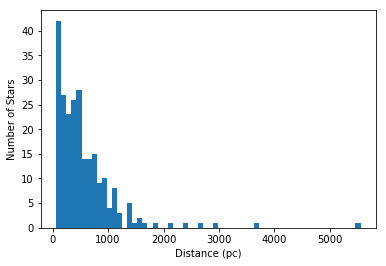

In [39]:
#Create subset of stars of known distances 
RA_dist = np.array([])
DE_dist = np.array([])
for i in plx_indices:
    j = int(i)
    RA_dist = np.append(RA_dist, RA[j])
    DE_dist = np.append(DE_dist, DE[j])
    
plt.hist(distances, bins = 60)
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.show()

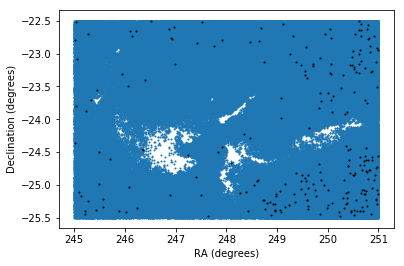

In [38]:
plt.scatter(RA,DE, s = 1)
plt.scatter(RA_dist, DE_dist, s=1, c = 'k')
plt.xlabel('RA (degrees)')
plt.ylabel('Declination (degrees)')
plt.show()

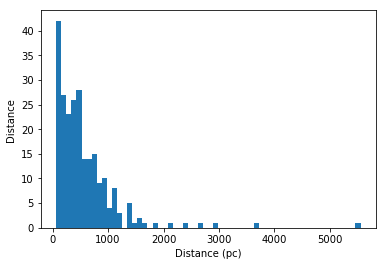

In [40]:
plt.hist(distances, bins = 60)
plt.xlabel('Distance (pc)')
plt.ylabel('Distance ')

In [42]:
count = 0
for i in range(len(distances)):
    if (distances[i] <= 140):
        print(distances[i])
        count = count +1
print(count)

84.817642344
112.233447489
90.4159097703
132.45032778
98.8142303664
135.501352912
126.903551456
80.7102479653
138.31258608
129.366105761
84.745761342
135.317999738
83.963057331
81.1030013129
80.515297412
97.3709791068
103.092785532
87.9507484666
107.296140852
122.399019665
64.3086808832
71.5307605683
90.6618335639
62.3830291432
137.741042489
79.8084613975
97.3709791068
101.832997055
136.425649442
105.042011756
139.275769347
93.4579455912
130.718952619
135.869562753
84.1750833642
84.745761342
36


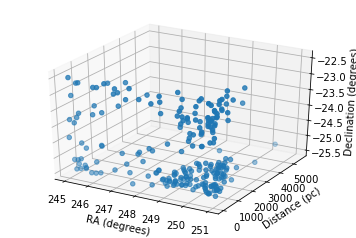

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(RA_dist,distances,DE_dist)
ax.set_xlabel('RA (degrees)')
ax.set_ylabel('Distance (pc)')
ax.set_zlabel('Declination (degrees)')

plt.show()

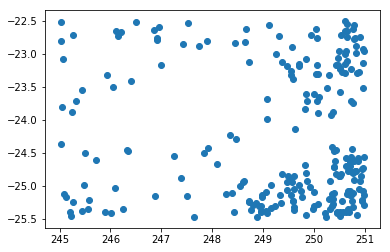

In [45]:
plt.scatter(RA_dist, DE_dist)
plt.show()

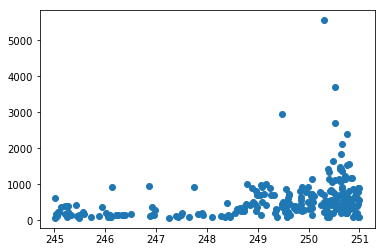

In [46]:
plt.scatter(RA_dist, distances)
plt.show()

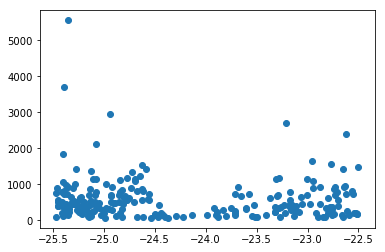

In [47]:
plt.scatter(DE_dist, distances)
plt.show()